In [4]:
# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [1]:
import vk
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Нам потребуется загрузить информацию о местах, в которых совершаются чекины, иначе говоря провести сбор данных (data collection). [Ссылка на ВК для разработчиков](https://vk.com/dev)

Для того, чтобы получить доступ к API прежде всего необходимо зарегистрироваться в VK в качестве разработчика и создать свое [приложение](https://vk.com/apps?act=manage). После создания приложения будет доступен набор ключей, которые мы будем использовать для аутентификации. Далее вам потребуется создать токен авторизации, чтобы получать доступ к API. Этот токен необходимо скопировать в соответствующие константы ниже. Подробнее о том, как работает аутентификация в VK API можно почитать [по ссылке](https://vk.com/dev/first_guide), хотя это нужно скорее для ознакомления: библиотека обращения с API позаботится о механизме аутентификации за нас.

In [15]:
ACCESS_TOKEN = "270544c7e54fe81e82a846da73ba779ddf572ce21d705d4aae16b358be8fb55a4e3a5e8fc56b150854012"
session = vk.Session(access_token=ACCESS_TOKEN)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [13]:
import time

def get_place_info(vkapi, idx=3):
    # Запрашиваем у ВК по 1000 мест раз в 3 секунды
    if idx > 1000:
        lists = [list(range(1000*i+1,1000*(i+1)+1)) for i in xrange(0,idx/1000)]
    else:
        lists = [list(range(1,idx+1))]
    df = pd.DataFrame()
    for places_ids in lists:
        response = pd.DataFrame(vkapi.places.getById(places=places_ids), index=places_ids)
        df = df.append(response)
        print "Получили {} мест от vk".format(response.shape[0])
        time.sleep(3)
    print "Всего получено {} мест".format(df.shape[0])
    return df

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 5000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

In [18]:
get_place_info(vkapi,5000).to_csv("vk5000.csv",encoding='utf-8')

Получили 1000 мест от vk
Получили 1000 мест от vk
Получили 1000 мест от vk
Получили 1000 мест от vk
Получили 1000 мест от vk
Всего получено 5000 мест


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
%matplotlib inline

In [115]:
df = pd.read_csv("vk5000.csv")
print "Загрузили датасет с {} элементами".format(df.shape[0])
df.head()

Загрузили датасет с 5000 элементами


,Unnamed: 0,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,1,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,2,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,3,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,4,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,5,Мусы Джалиля 14К1,38,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.488720e+09


In [25]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

In [26]:
data_moscow = df[df.city == 1]
print data_moscow.shape

(1668, 13)


In [113]:
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)

In [111]:
random_places = data_moscow[['latitude', 'longitude']]
random_places.shape

(1668, 2)

Видим, что в центре намного больше объектов, чем на окраине

In [112]:
marker_cluster = MarkerCluster(locations=random_places[['latitude', 'longitude']].values)
marker_cluster.add_to(moscow)
moscow

In [28]:
places_types = df.groupby("type")["city"].count()
places_types

type
3    3704
4    1296
Name: city, dtype: int64

Всего в выборке присутствуют объекты 3 и 4 типов, причем объектов 3 типа в 3 раза больше!

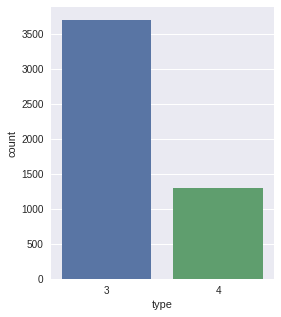

In [32]:
import seaborn as sns
fig = plt.figure(figsize=(4, 5))
sns.countplot(df.type)

Распределение числа чекинов:

In [43]:
print "Распределение по числу чекинов в зависимости от типа объектов"
print "Distr\ttype=3\ttype=4"
for i in [0,10,20,40,60,100,140,200,300,400,800]:
    print ">{}:\t {},\t {}".format(i,df.query("type == 3").checkins[df.checkins>=i].count(),df.query("type == 4").checkins[df.checkins>=i].count())

Распределение по числу чекинов в зависимости от типа объектов
Distr	type=3	type=4
>0:	 3704,	 1296
>10:	 1033,	 383
>20:	 603,	 240
>40:	 337,	 154
>60:	 215,	 116
>100:	 80,	 72
>140:	 44,	 49
>200:	 23,	 24
>300:	 12,	 15
>400:	 8,	 8
>800:	 2,	 2


Видно, что, хотя объектов 3 типа в целом в 3 раза больше, но объектов, у которых число чекинов превышает 100, примерно равное количество в обоих типах.

Распределение по числу чекинов, не превышающих 100

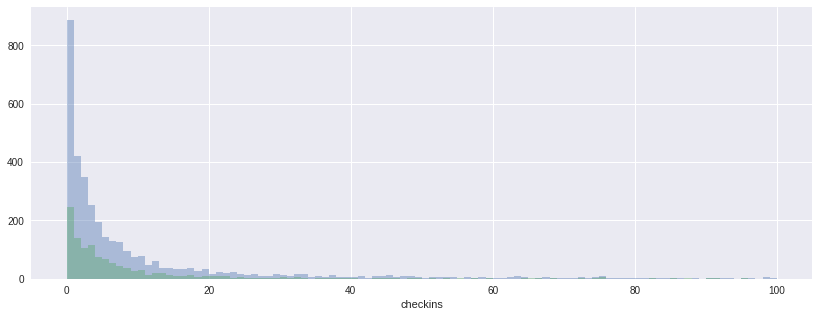

In [41]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(df.checkins[(df.checkins<100)&(df.type == 3)],bins=np.linspace(0,100,101),kde=False)
sns.distplot(df.checkins[(df.checkins<100)&(df.type == 4)],bins=np.linspace(0,100,101),kde=False)

Распределение по числу чекинов, больших 100

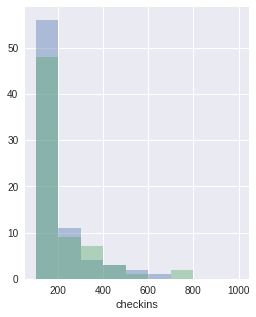

In [49]:
fig = plt.figure(figsize=(4, 5))
sns.distplot(df.checkins[(df.checkins>100)&(df.type == 3)],bins=np.linspace(100,1000,10),kde=False)
sns.distplot(df.checkins[(df.checkins>100)&(df.type == 4)],bins=np.linspace(100,1000,10),kde=False)

Посмотрим на квартили распределений:

In [100]:
type_3 = df.checkins[df.type == 3]
type_4 = df.checkins[df.type == 4]

stats = []
stats.append([int(type_3.quantile(.25)),int(type_4.quantile(.25))])
stats.append([int(type_3.quantile(.5)), int(type_4.quantile(.5))])
stats.append([int(type_3.quantile(.75)), int(type_4.quantile(.75))])
stats.append([type_3.min(), type_4.min()])
stats.append([type_3.max(), type_4.max()])
stats.append([type_3.mean(), type_4.mean()])

st = pd.DataFrame(stats,index=["Percentile .25","Median","Percentile .75", "Min","Max", "Average"],columns=["t3","t4"])
st.t3 = st.t3.astype(int)
st.t4 = st.t4.astype(int)
st.columns = ["тип 3","тип 4"]
st

,тип 3,тип 4
Percentile .25,1,1
Median,3,4
Percentile .75,11,12
Min,0,0
Max,1667,2305
Average,14,23


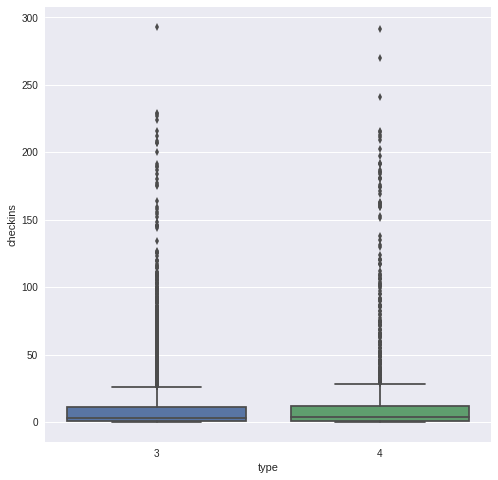

In [123]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(y=df.checkins[df.checkins < 300], x=df.type)

In [162]:
df = pd.read_csv('vk5000.csv')
df['created'] = pd.to_datetime(df['created'],unit='s')
print "Объектов, созданных больше года назад: {}".format(df[df.created < pd.Timestamp('2016-02-12')].shape[0])
print "Объектов, созданных 2 августа 2010 года: {}".format(df[(df.created < pd.Timestamp('2010-08-03'))&(df.created > pd.Timestamp('2010-08-01'))].shape[0])


Объектов, созданных больше года назад: 5000
Объектов, созданных 2 августа 2010 года: 5000
